## Linear Regression

In [116]:
# import
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

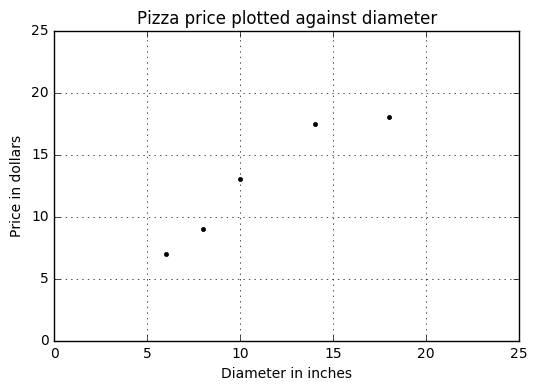

In [72]:
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

** Simple Linear Regression **

In [90]:
lReg = LinearRegression()

# fitting the data
lReg.fit(X, y)

# predicting the data for 12" pizza
lReg.predict([[12]])

y_pred = lReg.predict(X)

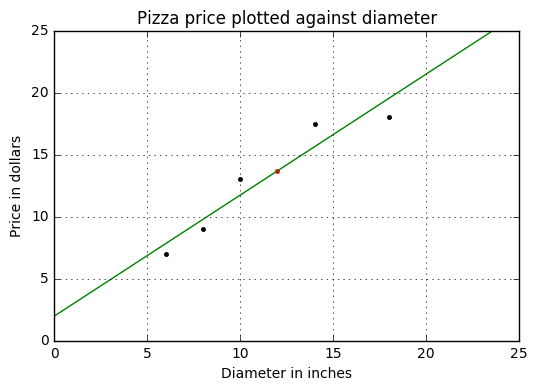

In [102]:
# plotting the new point in the plot


X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.plot([12], lReg.predict([[12]]), c='r', marker='.')
plt.axis([0, 25, 0, 25])
plt.grid(True)

x1 = [[0], [25]]
y1 = lReg.predict(x1)
plt.plot(x1, y1, 'g')
plt.show()


In [92]:
# priting model coeff and intercept
print("Co-efficient : ", lReg.coef_)
print("Intercept : ", lReg.intercept_)

Co-efficient :  [[ 0.9762931]]
Intercept :  [ 1.96551724]


#### Evaluating the fitness of a model with a cost function  

    A cost function, also called a loss function, is used to define and measure the error of a mode  
    The differences between the predicted and observed values in the test data are called prediction errors or test errors.  
    
We are going to use Residual Sum of Square cost function to evaluate our model 

$$ RSS = \sum_{i=1}^{n} (y_i - f(x))^2 $$

In [95]:
# RSS(
#print(y, lReg.predict(X))
#print("RSS : ", np.sum(np.square(y-y_pred)))
print("RSS : ", np.mean(np.square(y-lReg.predict(X))))

RSS :  1.74956896552


** Variance **  
Variance is a measure of how far a set of values is spread out. If all of the numbers 
in the set are equal, the variance of the set is zero. A small variance indicates that the 
numbers are near the mean of the set, while a set containing numbers that are far 
from the mean and each other will have a large variance. Variance can be calculated 
using the following equation:

$$ VAR = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2 }{n-1} $$

In [96]:
print("X: ", X)
print ("mean X: ", np.mean(X))

var = np.sum(np.square(X - np.mean(X)))/(len(X)-1)
print("Variance: ", var)

print("Variance: ",np.var(X, ddof=1))

X:  [[6], [8], [10], [14], [18]]
mean X:  11.2
Variance:  23.2
Variance:  23.2


** Covariance **   
Covariance is a measure of how much two variables change together. If the value of 
the variables increase together, their covariance is positive. If one variable tends to 
increase while the other decreases, their covariance is negative. If there is no linear 
relationship between the two variables, their covariance will be equal to zero; the 
variables are linearly uncorrelated but not necessarily independent. Covariance can 
be calculated using the following formula:

$$ CoVar(x,y) = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y}) }{n-1} $$

In [101]:
X1 = [6, 8, 10, 14, 18]
y1 = [7, 9, 13, 17.5, 18]
xbar = np.mean(X1)
ybar = np.mean(y1)

covar = np.sum((X1 - xbar)*(y1 - ybar))/(len(X1)-1)
print("CoVariance: ", covar)

print("CoVariance: ",np.cov(X1, y1)[0,1])

CoVariance:  22.65
CoVariance:  22.65


We know that simple linear regression follows the below equation :
 $$ y = \alpha + \beta{x} $$  
 
where $$ \beta = \frac{cov(X,y)}{var(x)}  $$

In [98]:
# let's get the beta
beta = covar/var
alpha = np.mean(y) - beta*np.mean(X)
print("beta b (co-efficient)= ", beta)
print("alpha a (intercept)= ", alpha)

beta b (co-efficient)=  0.976293103448
alpha a (intercept)=  1.96551724138


In [99]:
x2 = [[11], [18]]
print(lReg.predict(x2))

[[ 12.70474138]
 [ 19.5387931 ]]


### Evaluating the model  

**R-squared measures** how well 
the observed values of the response variables are predicted by the model. More 
concretely, r-squared is the proportion of the variance in the response variable that 
is explained by the model. An r-squared score of one indicates that the response 
variable can be predicted without any error using the model. An r-squared score of 
one half indicates that half of the variance in the response variable can be predicted 
using the model. There are several methods to calculate r-squared. In the case of 
simple linear regression, r-squared is equal to the square of the Pearson product 
moment correlation coefficient, or Pearson's r. 

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$
where
$$ SS_{res} = \sum_{i=1}^{n} (y_i - f(x_i))^2  $$ 

$$ SS_{tot} = \sum_{i=1}^{n} (y_i - \overline{y})^2  $$ 

Using this method, r-squared must be a positive number between zero and one. 
This method is intuitive; if r-squared describes the proportion of variance in the 
response variable explained by the model, it cannot be greater than one or less than 
zero. Other methods, including the method used by scikit-learn, do not calculate 
r-squared as the square of Pearson's r, and can return a negative r-squared if the 
model performs extremely poorly.

In [107]:
SSres = np.mean(np.square(y-lReg.predict(X)))
print(SSres)
SStot = np.mean(np.square(y-np.mean(y)))
print(SStot)

Rsqr = 1 - (SSres/SStot)
print("R sqare score:", Rsqr)
print("R sqare score:",lReg.score(X, y))

1.74956896552
19.44
R sqare score: 0.910001596424
R sqare score: 0.910001596424


R squre Score is quite high which says there is a large proportion of the variance in the data

### Multiple Linear Regression

In [110]:
# in this there are two features of pizza - diameter and no of toppings

X = [[6,2],[8,1],[10, 0],[14,2],[18, 0]]
y = [[7],[9],[13],[17.5],[18]]
X_test = [[8,2],[9,0],[11,2],[16,2],[12, 0]]
y_test = [[11],[8.5],[15],[18],[11]]

In [115]:
lReg2 = LinearRegression()
lReg2.fit(X, y)

y_pred = lReg2.predict(X_test)

print("Training Score:", lReg2.score(X_test, y_test))
print("Test Score:", lReg2.score(X_test, y_test))

for i, yp in enumerate(y_pred):
    print("predicted : ",yp, " Actual : ", y_test[i])

Training Score: 0.770167773132
Test Score: 0.770167773132
predicted :  [ 10.0625]  Actual :  [11]
predicted :  [ 10.28125]  Actual :  [8.5]
predicted :  [ 13.09375]  Actual :  [15]
predicted :  [ 18.14583333]  Actual :  [18]
predicted :  [ 13.3125]  Actual :  [11]


### Polynomial Regression

In [118]:
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
X_test = [[6],[8],[11],[16]]
y_test = [[8],[12],[15],[18]]

[[ 0.9762931]] [ 1.96551724]


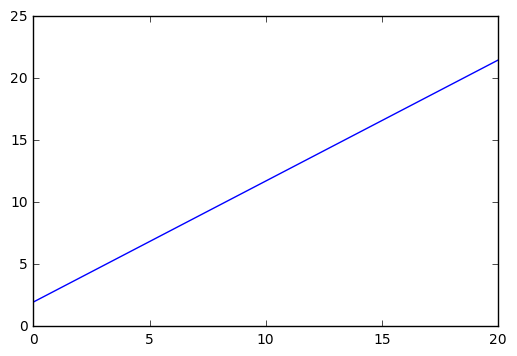

In [123]:
lReg3 = LinearRegression()
lReg3.fit(X, y)

print(lReg3.coef_, lReg3.intercept_)

xx = np.linspace(0, 20, 100)
yy = lReg3.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)

In [ ]:
# doing feature preprocessing
quad = PolynomialFeatures(degree=2)
X_train = quad.fit_transform(X)
X_test = quad.fit_transform(X_test)

xx = np.linspace(0, 20, 100)
yy = lReg3.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)


lReg4 = LinearRegression()
lReg4.fit(X_train, y)

xx_quad = quad.fit_transform(xx.reshape(xx.shape[0],1))
yy = lReg4.predict(xx_quad)
plt.plot(xx,yy)